In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lime
import lime.lime_tabular
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

## EDA

In [ ]:
df = pd.read_csv('../data/candidate_data.csv')
df.describe()

,Applicant ID,GPA
count,4000.000000,4000.000000
mean,2000.500000,2.572025
std,1154.844867,0.825073
min,1.000000,1.200000
25%,1000.750000,1.900000
50%,2000.500000,2.600000
75%,3000.250000,3.300000
max,4000.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant ID        4000 non-null   int64  
 1   School Name         4000 non-null   object 
 2   GPA                 4000 non-null   float64
 3   Degree              4000 non-null   object 
 4   Location            4000 non-null   object 
 5   Gender              4000 non-null   object 
 6   Veteran status      4000 non-null   object 
 7   Work authorization  4000 non-null   object 
 8   Disability          4000 non-null   object 
 9   Ethnicity           4000 non-null   object 
 10  Role 1              4000 non-null   object 
 11  Start 1             4000 non-null   object 
 12  End 1               4000 non-null   object 
 13  Role 2              4000 non-null   object 
 14  Start 2             4000 non-null   object 
 15  End 2               4000 non-null   object 
 16  Role 3

In [ ]:
df.isnull().sum()

Applicant ID          0
School Name           0
GPA                   0
Degree                0
Location              0
Gender                0
Veteran status        0
Work authorization    0
Disability            0
Ethnicity             0
Role 1                0
Start 1               0
End 1                 0
Role 2                0
Start 2               0
End 2                 0
Role 3                0
Start 3               0
End 3                 0
dtype: int64

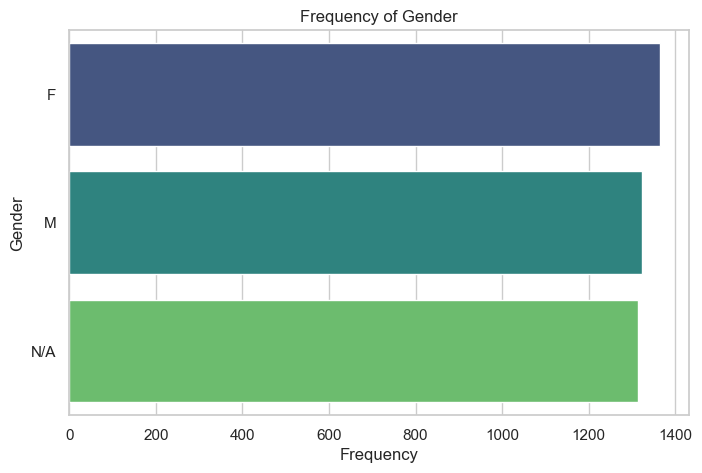

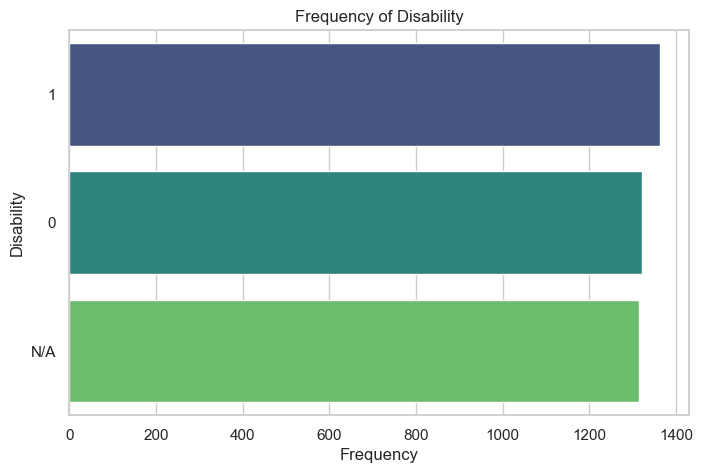

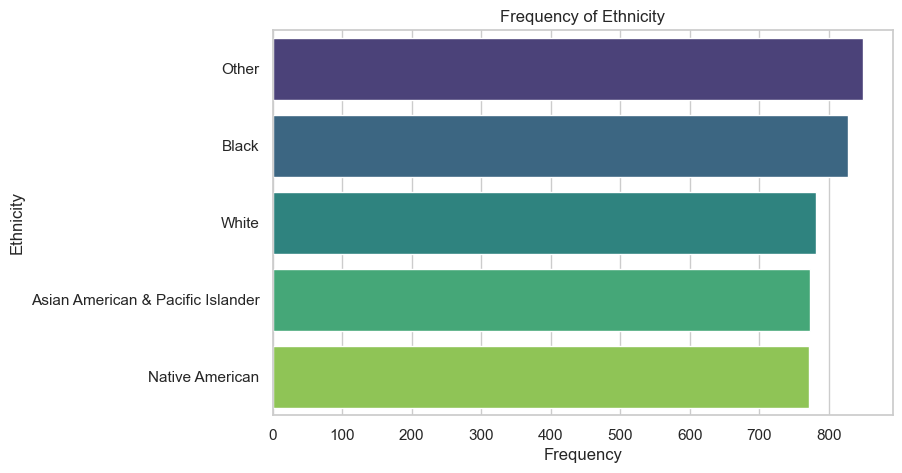

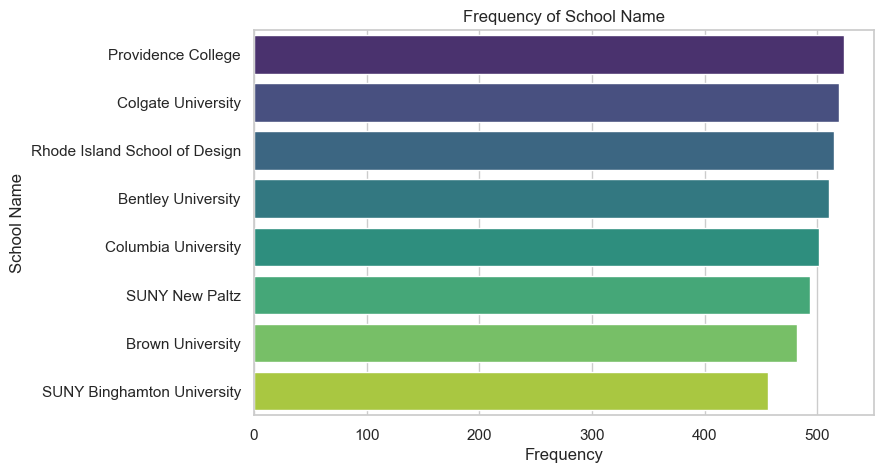

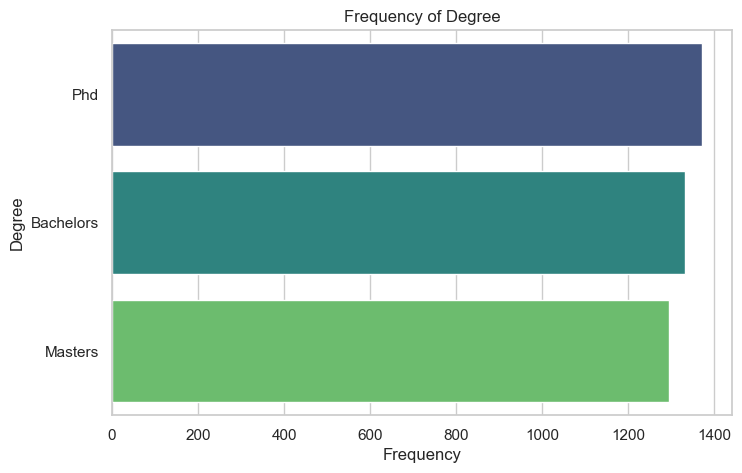

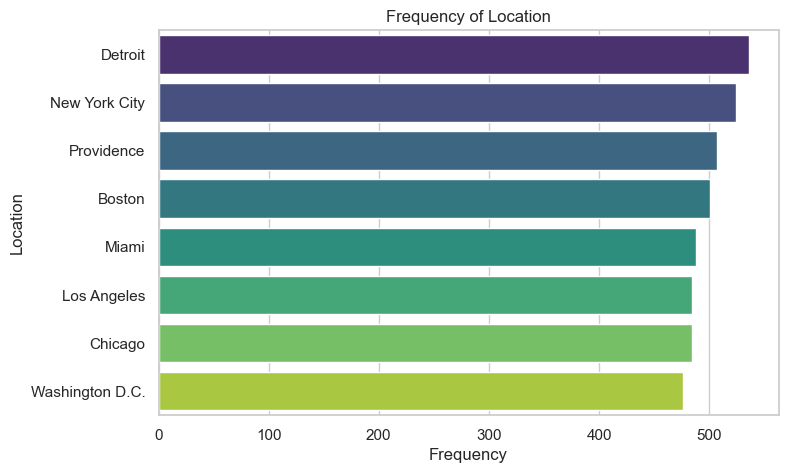

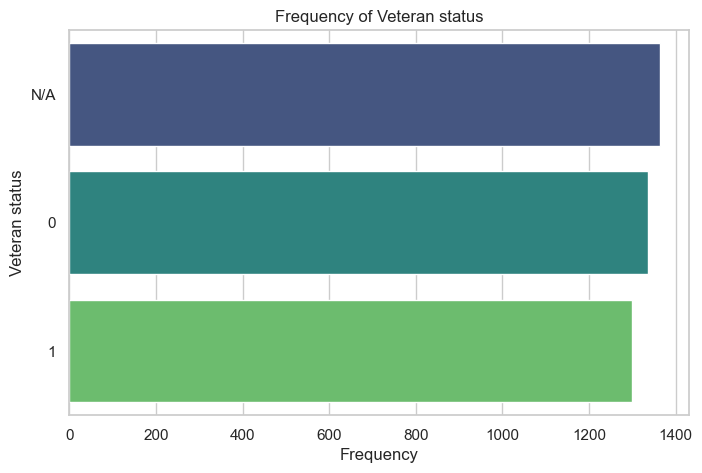

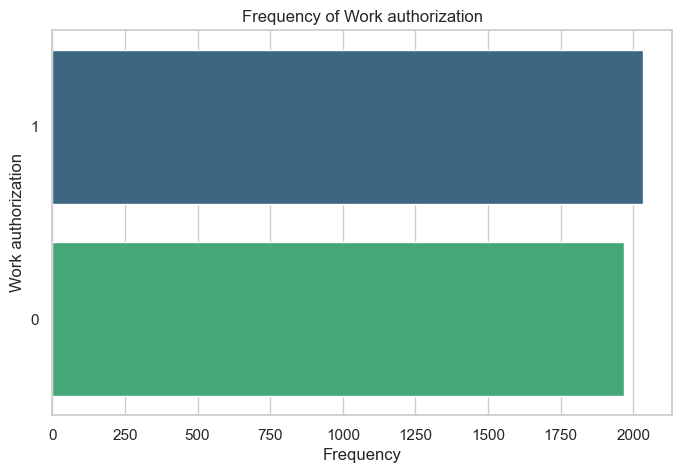

In [ ]:
# Frequency of features
sns.set(style="whitegrid")

# Define the mapping for the 'Ethnicity' attribute
ethnicity_labels = {
    0: "White",
    1: "Black",
    2: "Native American",
    3: "Asian American & Pacific Islander",
    4: "Other"
}

# Attributes to plot
attributes = ['Gender', 'Disability', 'Ethnicity', 'School Name', 'Degree', 'Location', 'Veteran status', 'Work authorization']

# Create a plot for each attribute
for i in attributes:
    plt.figure(figsize=(8, 5))
    ax = sns.countplot(data=df, y=i, order=df[i].value_counts().index, palette='viridis')
    ax.set_title(f'Frequency of {i}')
    ax.set_xlabel('Frequency')
    ax.set_ylabel(i)

    # If plotting 'Ethnicity', modify the y-axis labels
    if i == 'Ethnicity':
        # Get the current labels
        labels = [item.get_text() for item in ax.get_yticklabels()]
        # Set new labels based on the ethnicity_labels mapping
        new_labels = [ethnicity_labels[int(lbl)] for lbl in labels]
        ax.set_yticklabels(new_labels)

    plt.show()

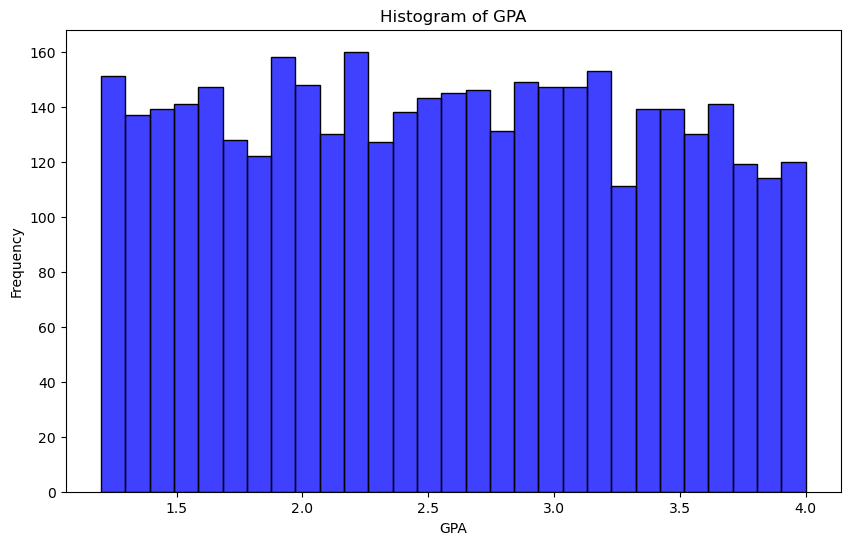

In [37]:
# Histogram of GPA
plt.figure(figsize=(10, 6))
sns.histplot(df['GPA'], kde=False, bins=29, color='blue')
plt.title('Histogram of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()